### Visualize Intermediate Activations of PyTorch AlexNet

In [2]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load the pre-trained AlexNet model
alexnet = models.alexnet(pretrained=True)
alexnet.eval()  # Set the model to evaluation mode

/drv3/hm3/code/python/torch/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/drv3/hm3/code/python/torch/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [6]:
def count_params(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

count_params( alexnet )


61100840

In [7]:
# Define the image transformations
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [41]:

image_path = "/drv3/hm3/Data/ImgData/Oxford_iiit_pets/cat_img_from_amazon_s3.jpg"
image_path = "/drv3/hm3/Data/ImgData/Oxford_iiit_pets/dog.582.jpg"
#image_path = "/drv3/hm3/Data/ImgData/Oxford_iiit_pets/cat.444.jpg"
#image_path = "/drv3/hm3/Data/ImgData/Oxford_iiit_pets/baby_794.jpg"
#image_path = "/drv3/hm3/Data/ImgData/BruntonBookCh01_Images/JasiuBaby.jpg"
#image_path = "/home/juan/Pictures/Truck.png"
#image_path = "/drv3/hm3/Data/ImgData/Oxford_iiit_pets/CeciliaMaya.png"


In [42]:
# Load an example image (replace 'your_image.jpg' with your image path)
image = Image.open( image_path )
image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

# Dictionary to store the activations
activations = {}


In [35]:
# Define the hook function
def get_activation(name):
    def hook(model, input, output):
        activations[name] = output.detach()
    return hook

In [43]:
# Register hooks for the desired layers (e.g., conv1, conv2, etc.)
alexnet.features[0].register_forward_hook(get_activation('conv1'))
alexnet.features[3].register_forward_hook(get_activation('conv2'))
alexnet.features[6].register_forward_hook(get_activation('conv3'))
alexnet.features[8].register_forward_hook(get_activation('conv4'))
alexnet.features[10].register_forward_hook(get_activation('conv5'))

In [44]:
# Forward pass
output = alexnet(image_tensor)

In [38]:
def visualize_activations(activations, layer_name, num_filters=16):
    activation = activations[layer_name]
    num_filters = min(num_filters, activation.shape[1])
    plt.figure(figsize=(15, 10))
    for i in range(num_filters):
        plt.subplot(4, 4, i + 1)
        plt.imshow(activation[0, i, :, :].cpu().numpy(), cmap='viridis')
        plt.title(f'{layer_name} Filter {i}')
        plt.axis('off')
    plt.show()


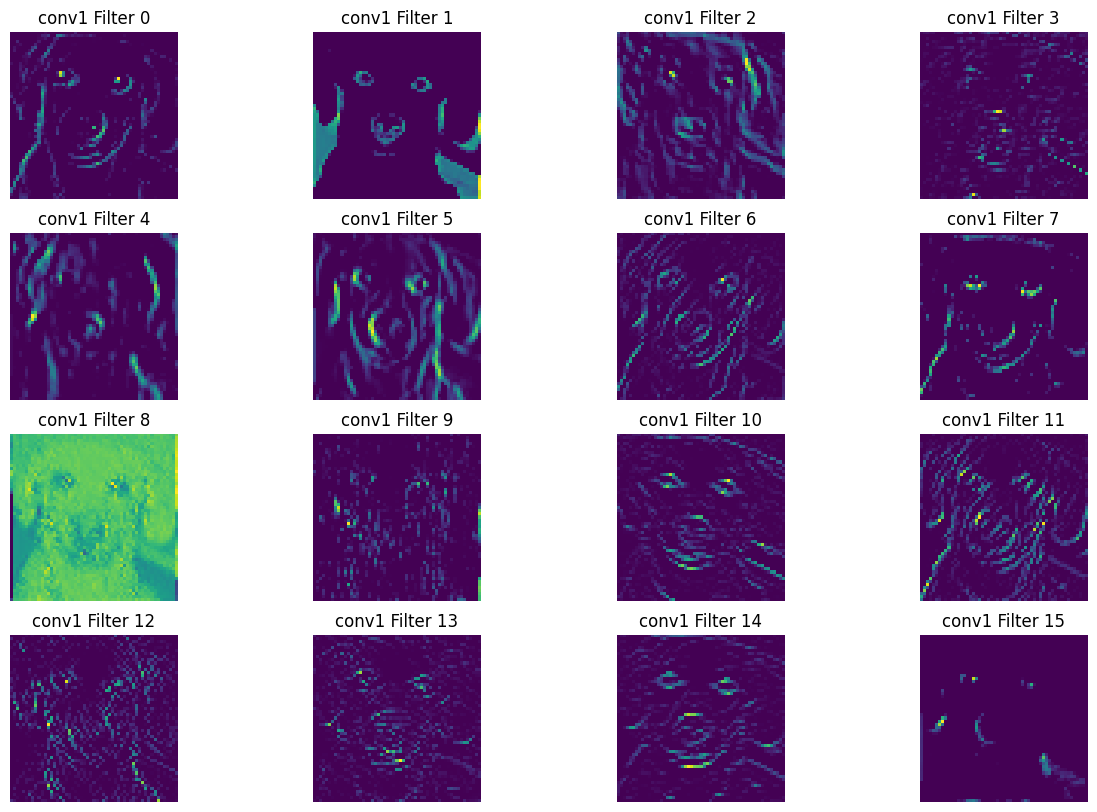

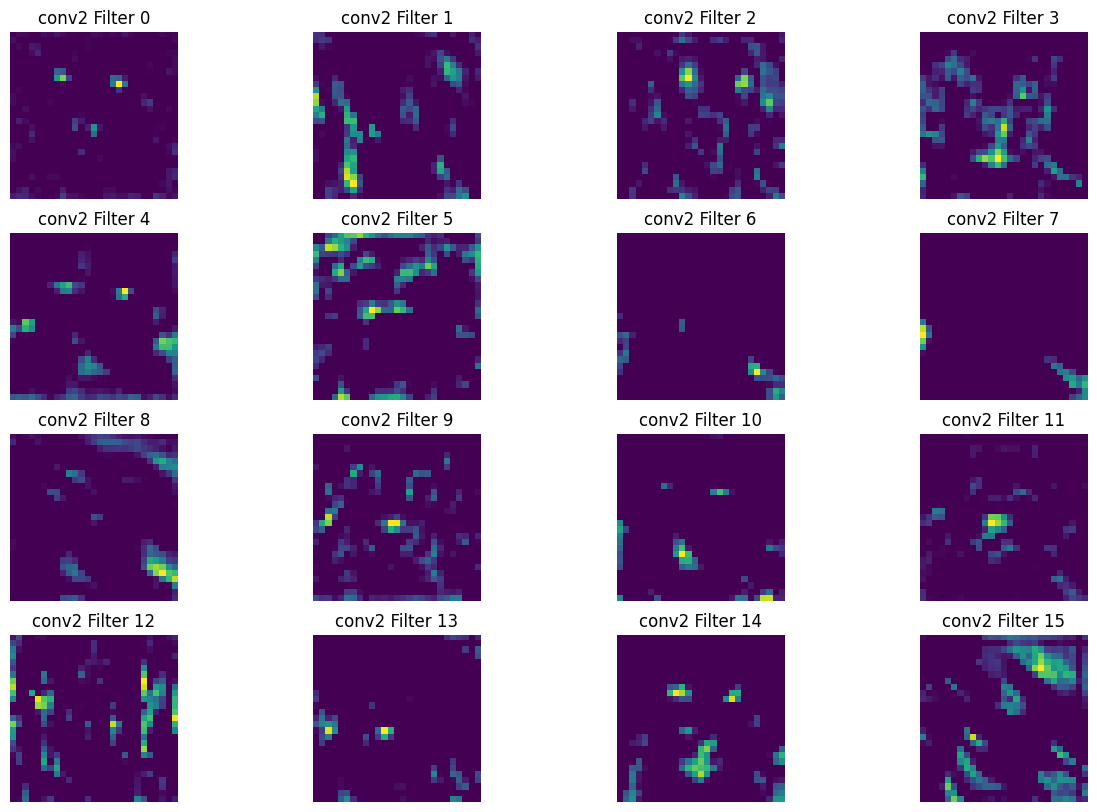

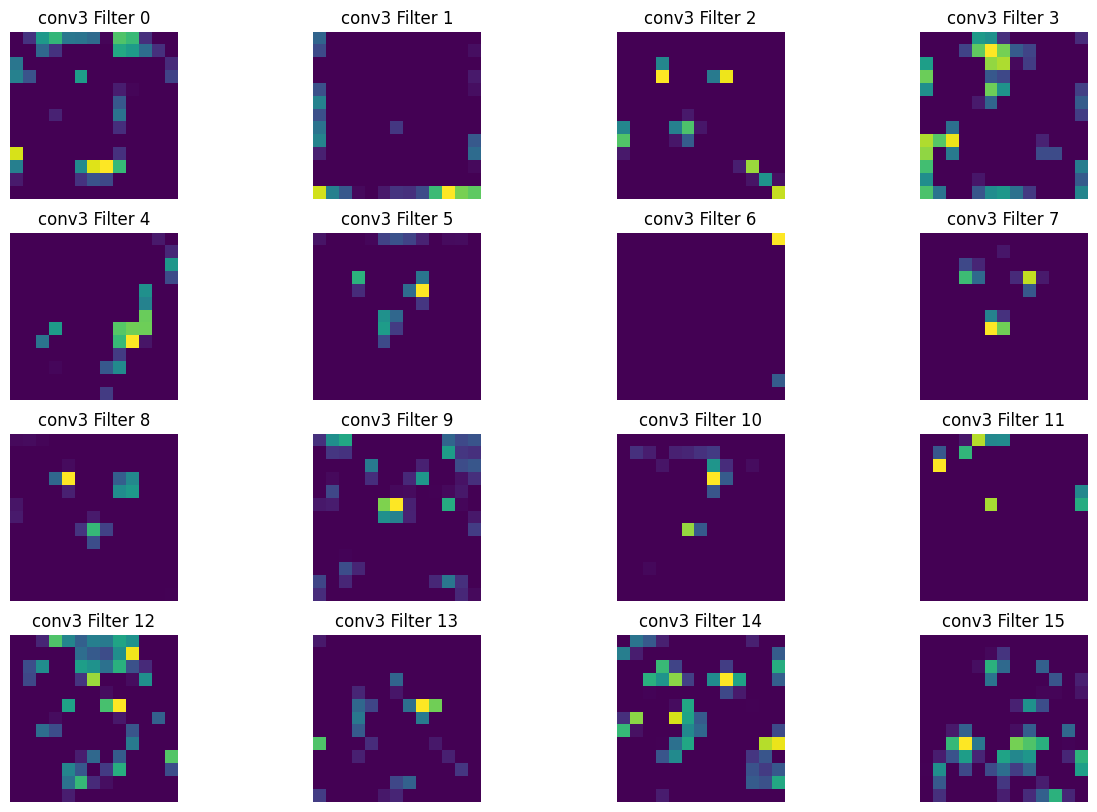

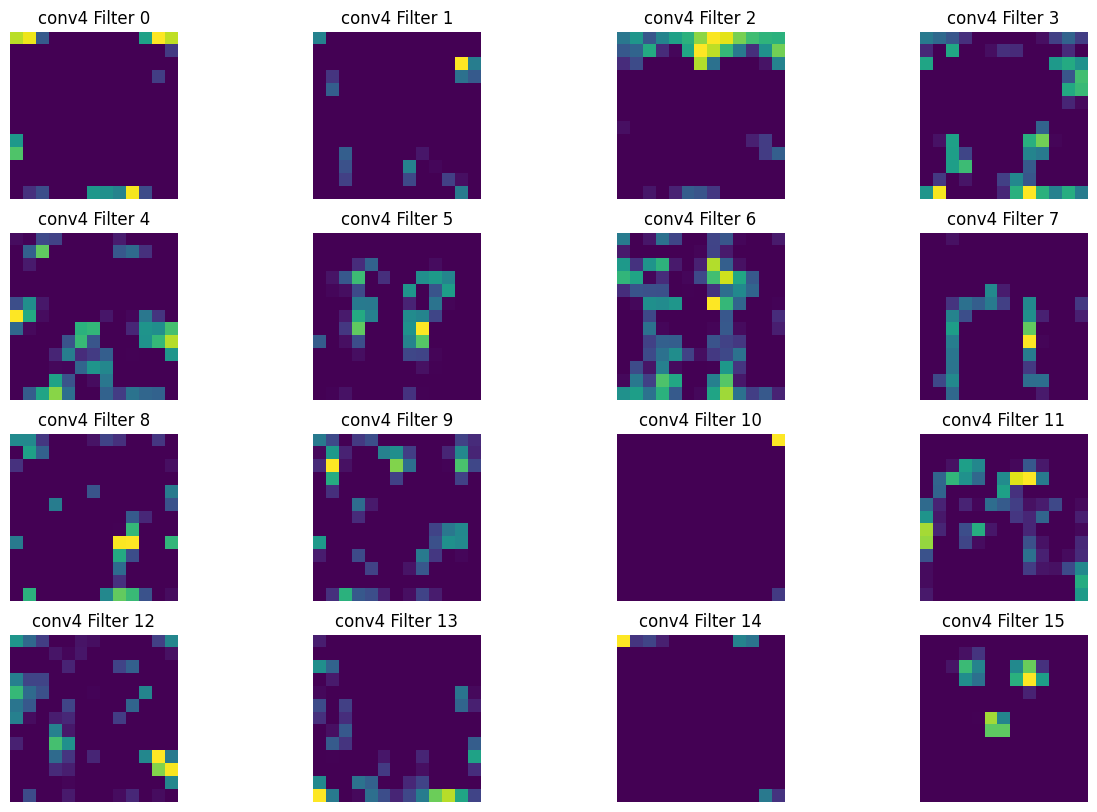

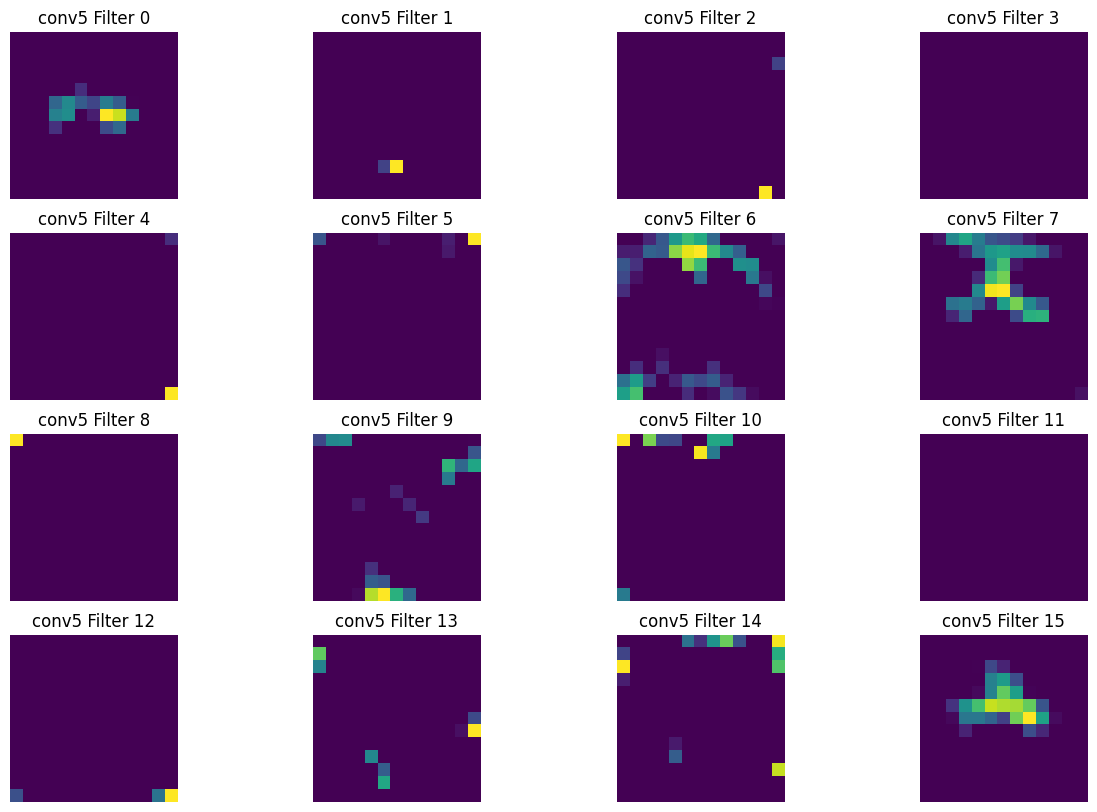

In [45]:
    # Visualize the activations
visualize_activations(activations, 'conv1')
visualize_activations(activations, 'conv2')
visualize_activations(activations, 'conv3')
visualize_activations(activations, 'conv4')
visualize_activations(activations, 'conv5')